In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = "{:20.3f}".format

# Showing all the columns on the output
pd.set_option("display.max_columns", 999)

# Data Exploration

In [2]:
# importing the Dataset
dataset = pd.read_excel("Dataset\online+retail+ii\online_retail_II.xlsx", sheet_name = 0)

dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
dataset.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000,525461,525461.000,417534.000
mean,10.338,2010-06-28 11:37:36.845017856,4.689,15360.645
min,-9600.000,2009-12-01 07:45:00,-53594.360,12346.000
25%,1.000,2010-03-21 12:20:00,1.250,13983.000
50%,3.000,2010-07-06 09:51:00,2.100,15311.000
75%,10.000,2010-10-15 12:45:00,4.210,16799.000
max,19152.000,2010-12-09 20:01:00,25111.090,18287.000
std,107.424,NaN,146.127,1680.811


In [5]:
dataset.describe(include = "O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
# Number of NaN values in the "Customer ID" column
print("Number of NaN values in the \"Customer ID\" column: {0}".format(len(dataset[dataset["Customer ID"].isna()])))

Number of NaN values in the "Customer ID" column: 107927


In [7]:
dataset[dataset["Customer ID"].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.000,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.000,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.000,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.000,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.550,NaN,United Kingdom


In [8]:
# Number of the rows which has value = 0 for the Quantity column
print("Numbers of rows with 0 value in the \"Quantity\" column: {0}".format(len(dataset[dataset["Quantity"] < 0])))

Numbers of rows with 0 value in the "Quantity" column: 12326


In [9]:
dataset[dataset["Quantity"] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia


In [10]:
# Changing the DataType of the Invoice column so that we can apply regex
dataset["Invoice"] = dataset["Invoice"].astype("str")

# Returning all the values which does not have exactly 6 digits
dataset[dataset["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.100,12605.000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.500,15329.000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.950,15329.000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.750,15329.000,United Kingdom


In [11]:
# Checking the number of unique characters that came after the digits in the StockCode column
dataset["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
dataset[dataset["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.360,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.790,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.870,NaN,United Kingdom


In [13]:
dataset["StockCode"] = dataset["StockCode"].astype("str")
dataset[(dataset["StockCode"].str.match("^\\d{5}$") == False) & (dataset["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [14]:
dataset[dataset["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.190,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.960,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.390,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.350,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.390,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.940,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.320,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.680,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.940,NaN,United Kingdom


# Data Cleaning

In [15]:
cleaned_df = dataset.copy()

In [16]:
# Convert the "Invoice" column to string type
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

# Create a mask to filter rows where the "Invoice" column matches a 6-digit number (regex pattern for exactly 6 digits)
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

# Filter the DataFrame to keep only the rows that match the mask (i.e., valid 6-digit invoice numbers)
cleaned_df = cleaned_df[mask]

# Display the first few rows of the cleaned DataFrame
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [17]:
# Convert the "StockCode" column to string type
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

# Create a mask to filter rows where "StockCode" matches one of the following:
# 1. A 5-digit number (regex pattern for exactly 5 digits)
# 2. A 5-digit number followed by one or more letters
# 3. The exact string "PADS"
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |  # 5-digit number
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |  # 5-digit number followed by letters
    (cleaned_df["StockCode"].str.match("^PADS$") == True)  # Exact string "PADS"
)

# Filter the DataFrame to keep only the rows that match the mask
cleaned_df = cleaned_df[mask]

# Display the first few rows of the cleaned DataFrame
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [18]:
cleaned_df.dropna(subset = ["Customer ID"], inplace = True)

In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000,406337,406337.000,406337.000
mean,13.619,2010-07-01 10:11:06.543288320,2.991,15373.633
min,1.000,2009-12-01 07:45:00,0.000,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14004.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,97.001,NaN,4.286,1677.366


In [20]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [21]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000,406309,406309.000,406309.000
mean,13.618,2010-07-01 10:14:25.869572352,2.992,15373.722
min,1.000,2009-12-01 07:45:00,0.001,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14006.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,96.999,NaN,4.286,1677.329


In [23]:
print("The percentage of the data which is deleted during the cleaning process: {0:.3f}%.".format((1-(len(cleaned_df)/len(dataset)))*100))

The percentage of the data which is deleted during the cleaning process: 22.676%.


# Feature Engineering

In [24]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


In [25]:
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False). \
                agg(
                    MonetaryValue = ("SalesLineTotal", "sum"),
                    Frequency = ("Invoice", "nunique"),
                    LastInvoiceDate = ("InvoiceDate", "max")
                )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.000,169.360,2,2010-06-28 13:53:00
1,12347.000,1323.320,2,2010-12-07 14:57:00
2,12348.000,221.160,1,2010-09-27 14:59:00
3,12349.000,2221.140,2,2010-10-28 08:23:00
4,12351.000,300.930,1,2010-11-29 15:23:00


In [26]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
count,4285.000,4285.000,4285.000,4285
mean,15356.807,2024.127,4.426,2010-09-11 00:06:10.431738624
min,12346.000,1.550,1.000,2009-12-01 10:49:00
25%,13891.000,307.560,1.000,2010-07-27 14:39:00
50%,15362.000,702.900,2.000,2010-10-19 12:10:00
75%,16840.000,1704.290,5.000,2010-11-22 11:24:00
max,18287.000,349164.350,183.000,2010-12-09 20:01:00
std,1699.839,8813.946,7.938,NaN


In [27]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.000,169.360,2,2010-06-28 13:53:00,164
1,12347.000,1323.320,2,2010-12-07 14:57:00,2
2,12348.000,221.160,1,2010-09-27 14:59:00,73
3,12349.000,2221.140,2,2010-10-28 08:23:00,42
4,12351.000,300.930,1,2010-11-29 15:23:00,10


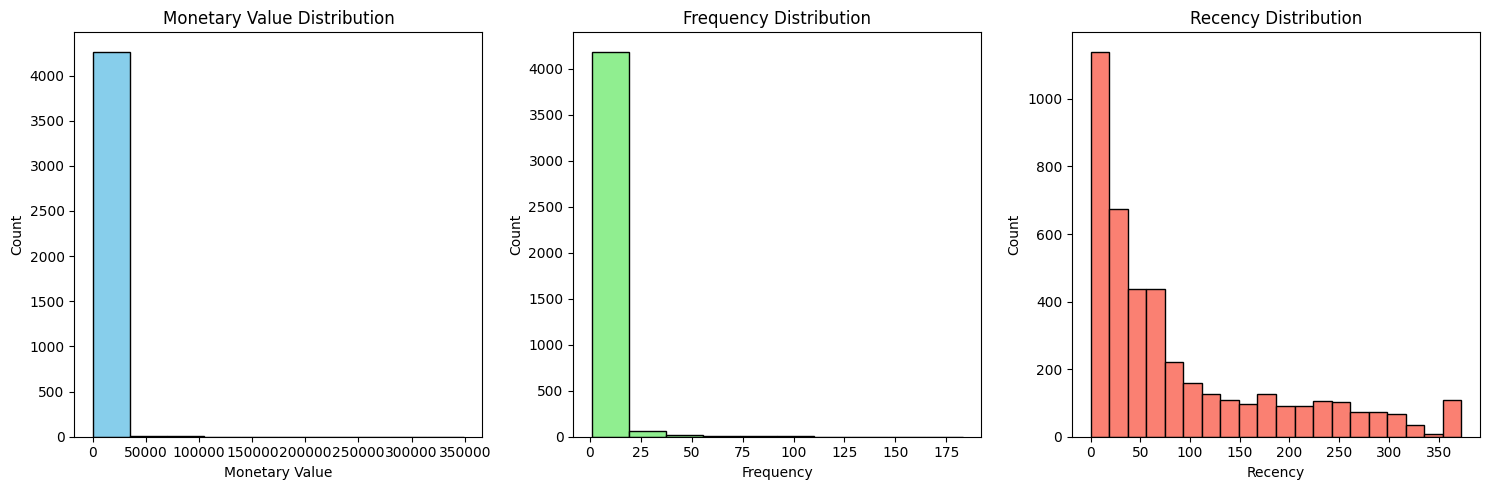

In [28]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"], bins = 10, color = "skyblue", edgecolor = "black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(aggregated_df["Frequency"], bins = 10, color = "lightgreen", edgecolor = "black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(aggregated_df["Recency"], bins = 20, color = "salmon", edgecolor = "black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

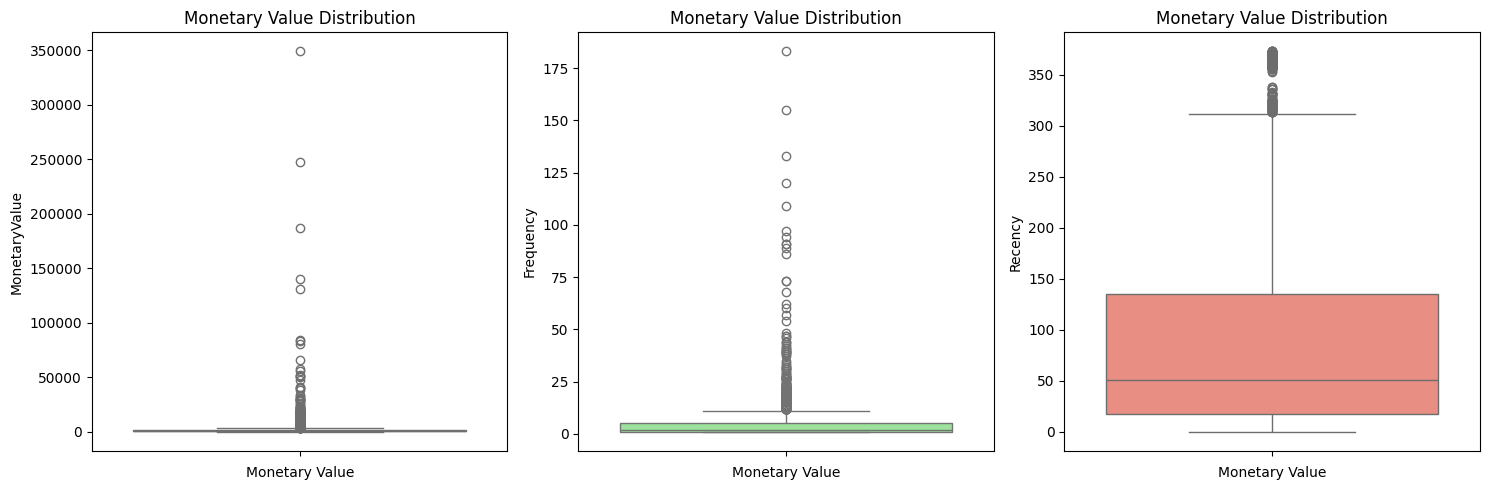

In [29]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df["MonetaryValue"], color = "skyblue")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_df["Frequency"], color = "lightgreen")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 3)
sns.boxplot(data = aggregated_df["Recency"], color = "salmon")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.tight_layout()
plt.show()

In [30]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outliers = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | \
                                  (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000,423.000,423.000,423,423.000
mean,15103.040,12188.102,17.168,2010-11-09 12:26:02.978723328,30.035
min,12357.000,3802.040,1.000,2009-12-10 18:03:00,0.000
25%,13622.000,4605.940,8.000,2010-11-08 13:17:30,3.000
50%,14961.000,6191.320,12.000,2010-11-26 12:19:00,13.000
75%,16692.000,10273.235,18.000,2010-12-06 10:34:30,31.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,364.000
std,1728.661,25830.851,19.730,NaN,51.541


In [31]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)

F_IQR = F_Q3 - F_Q1

frequency_outliers = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | \
                                   (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000,279.000,279.000,279,279.000
mean,15352.656,14409.715,23.810,2010-11-23 11:06:20.645161216,16.090
min,12437.000,1094.390,12.000,2010-05-12 16:51:00,0.000
25%,13800.000,4331.560,13.000,2010-11-20 13:14:30,2.000
50%,15465.000,6615.770,17.000,2010-12-02 10:46:00,7.000
75%,16828.500,11692.405,23.000,2010-12-07 11:08:30,19.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,211.000
std,1748.430,31381.737,21.933,NaN,26.589


In [32]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) & (~aggregated_df.index.isin(frequency_outliers.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000,3809.000,3809.000,3809,3809.000
mean,15376.483,885.502,2.863,2010-09-03 11:16:46.516146176,97.082
min,12346.000,1.550,1.000,2009-12-01 10:49:00,0.000
25%,13912.000,279.910,1.000,2010-07-08 14:48:00,22.000
50%,15389.000,588.050,2.000,2010-10-12 16:25:00,58.000
75%,16854.000,1269.050,4.000,2010-11-17 13:14:00,154.000
max,18287.000,3788.210,11.000,2010-12-09 20:01:00,373.000
std,1693.200,817.672,2.244,NaN,98.111


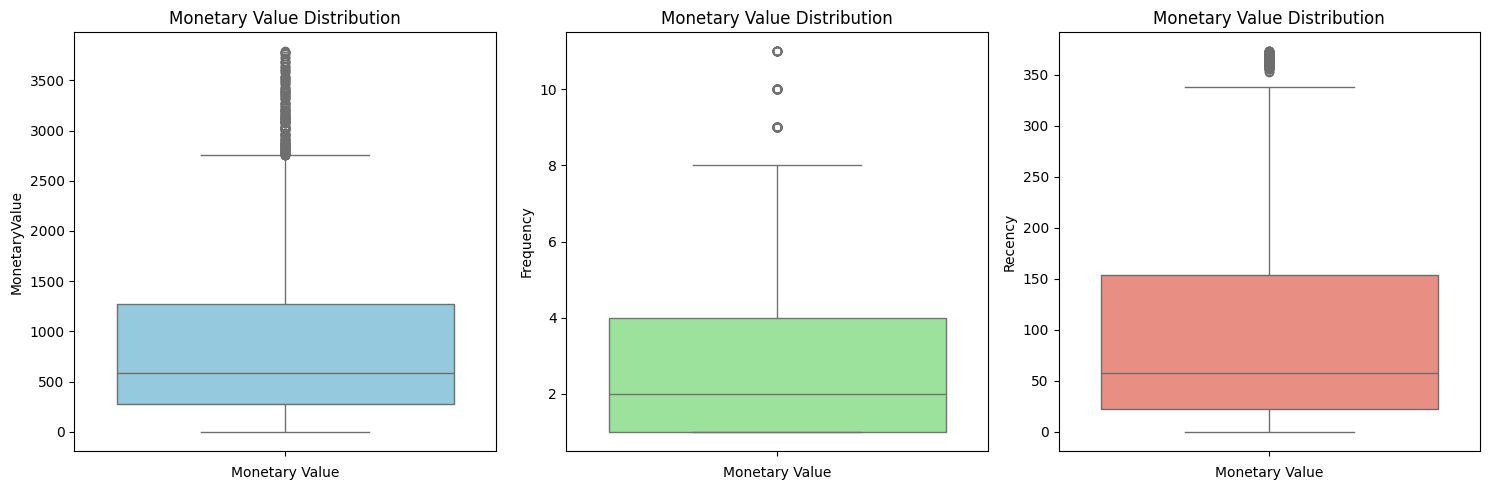

In [33]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df["MonetaryValue"], color = "skyblue")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers_df["Frequency"], color = "lightgreen")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 3)
sns.boxplot(data = non_outliers_df["Recency"], color = "salmon")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")

plt.tight_layout()
plt.show()

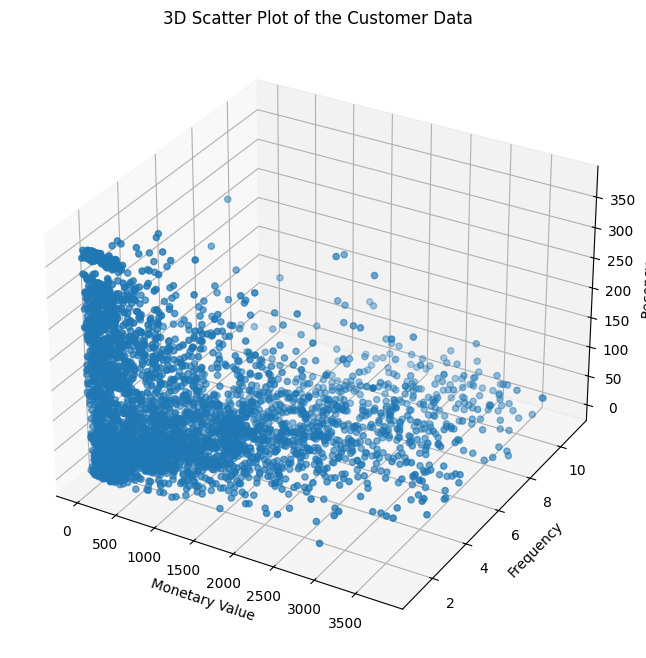

In [34]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of the Customer Data")

plt.show()

In [35]:
scalar = StandardScaler()

scaled_data = scalar.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [36]:
scaled_data = pd.DataFrame(scaled_data, 
                           index = non_outliers_df.index, 
                           columns = ("MonetaryValue", "Frequency", "Recency"))

scaled_data.head()

,MonetaryValue,Frequency,Recency
0,-0.876,-0.385,0.682
1,0.536,-0.385,-0.969
2,-0.813,-0.831,-0.245
3,1.634,-0.385,-0.561
4,-0.715,-0.831,-0.888


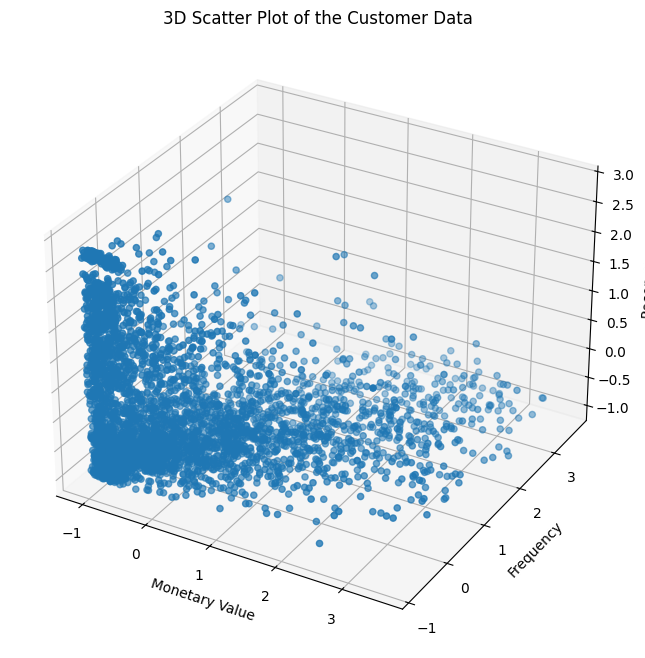

In [37]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data["MonetaryValue"], scaled_data["Frequency"], scaled_data["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of the Customer Data")

plt.show()

# KMeans Clustering

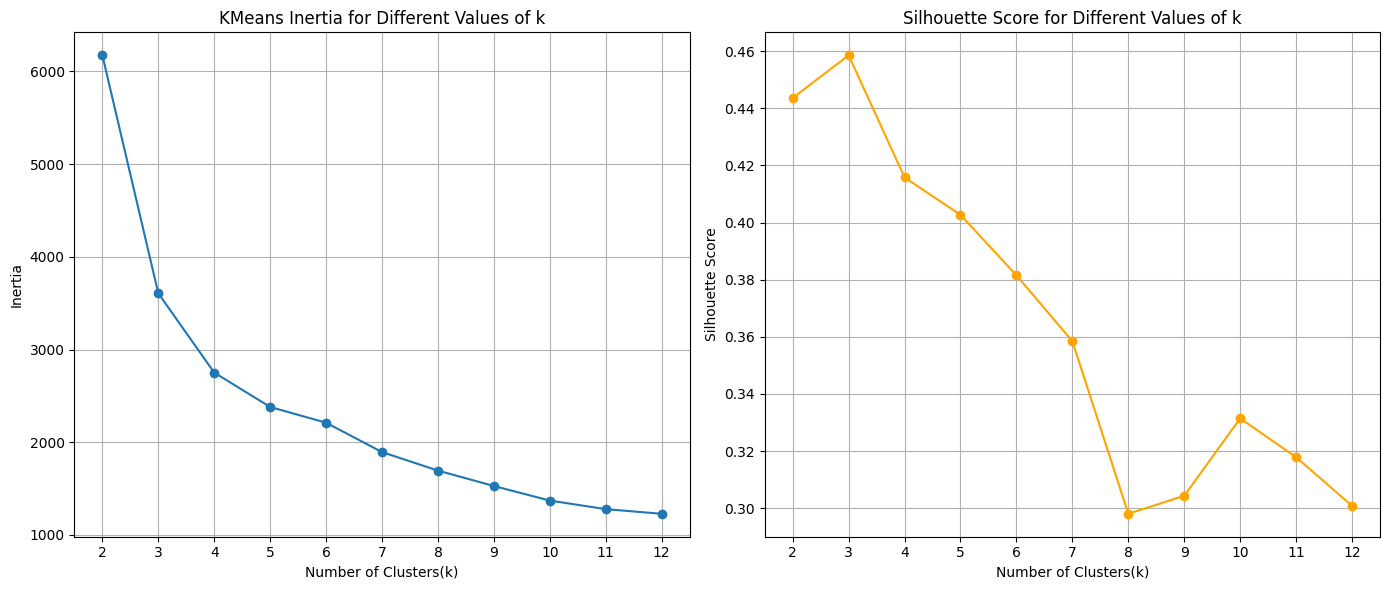

In [38]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

    cluster_labels = kmeans.fit_predict(scaled_data)

    sil_score = silhouette_score(scaled_data, cluster_labels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = "o")
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker = "o", color = "orange")
plt.title("Silhouette Score for Different Values of k")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(scaled_data)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [40]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_34592\3901905515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2


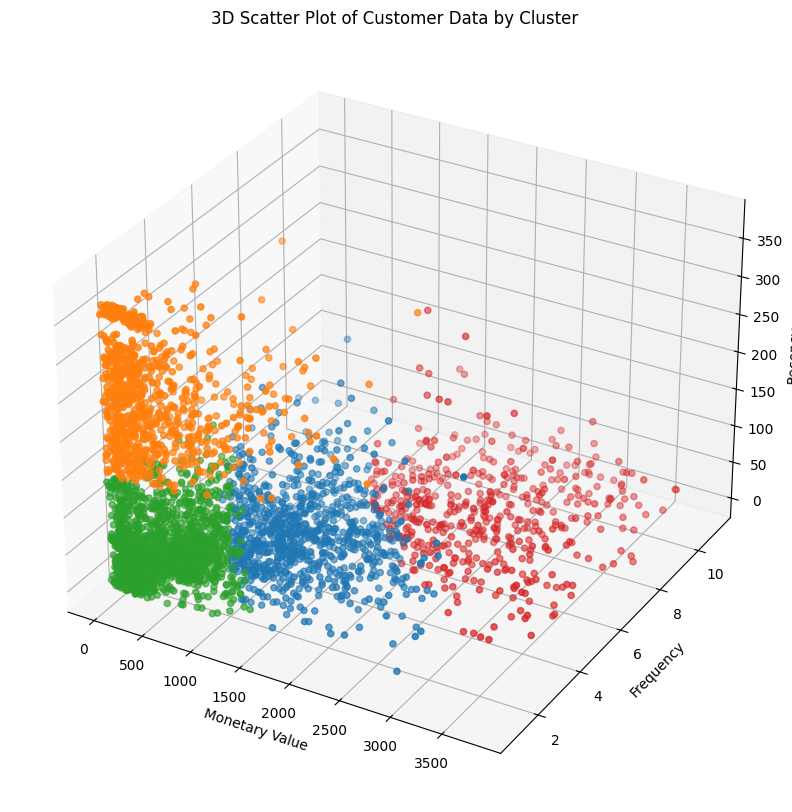

In [41]:
cluster_colors = {
    0: "#1f77b4", # Blue
    1: "#ff7f0e", # Orange
    2: "#2ca02c", # Green
    3: "#d62728"  # Red 
}

colors = non_outliers_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c = colors,
                     marker = "o")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data by Cluster")

plt.show()

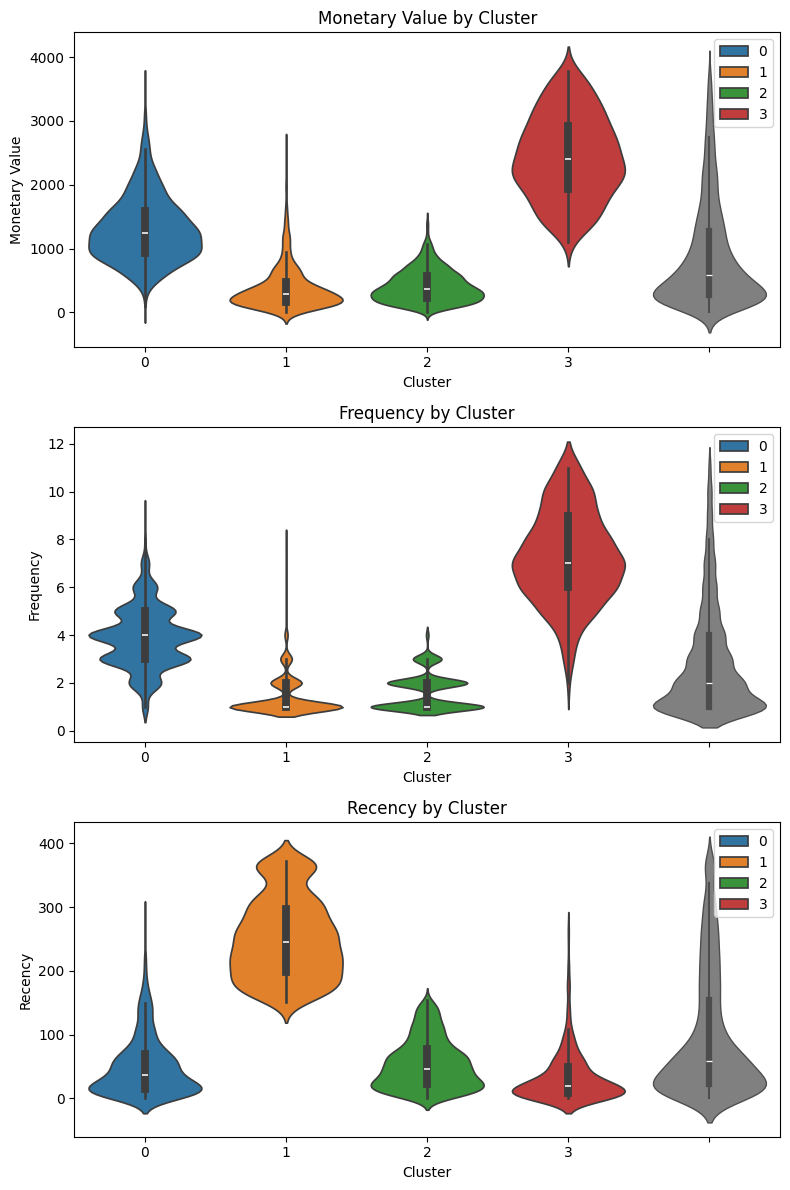

In [48]:
plt.figure(figsize = (8, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_df["Cluster"], y = non_outliers_df["MonetaryValue"], palette = cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["MonetaryValue"], color = "grey", linewidth = 1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_df["Cluster"], y = non_outliers_df["Frequency"], palette = cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Frequency"], color = "grey", linewidth = 1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_df["Cluster"], y = non_outliers_df["Recency"], palette = cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Recency"], color = "grey", linewidth = 1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

### Insights about different clusters

1. Cluster 0 (Blue): "Retain"
    - Moderate-value, frequent customers with recent activity.

2. Cluster 1 (Orange): "Re-Engage"
    - Low-value, infrequent customers with very old transactions.

3. Cluster 2 (Green): "Nurture"
    - Low-value, infrequent customers with moderately recent activity.
    
4. Cluster 3 (Red): "Reward"
    - High-value, frequent, and recent customers (likely the most loyal and valuable).

In [51]:
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)

monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.000,11229.990,1,2010-11-16 10:05:00,23,-1
25,12380.000,4782.840,4,2010-08-31 14:54:00,100,-1
42,12409.000,12346.620,4,2010-10-15 10:24:00,55,-1
48,12415.000,19468.840,4,2010-11-29 15:07:00,10,-1
61,12431.000,4145.520,11,2010-12-01 10:03:00,8,-1


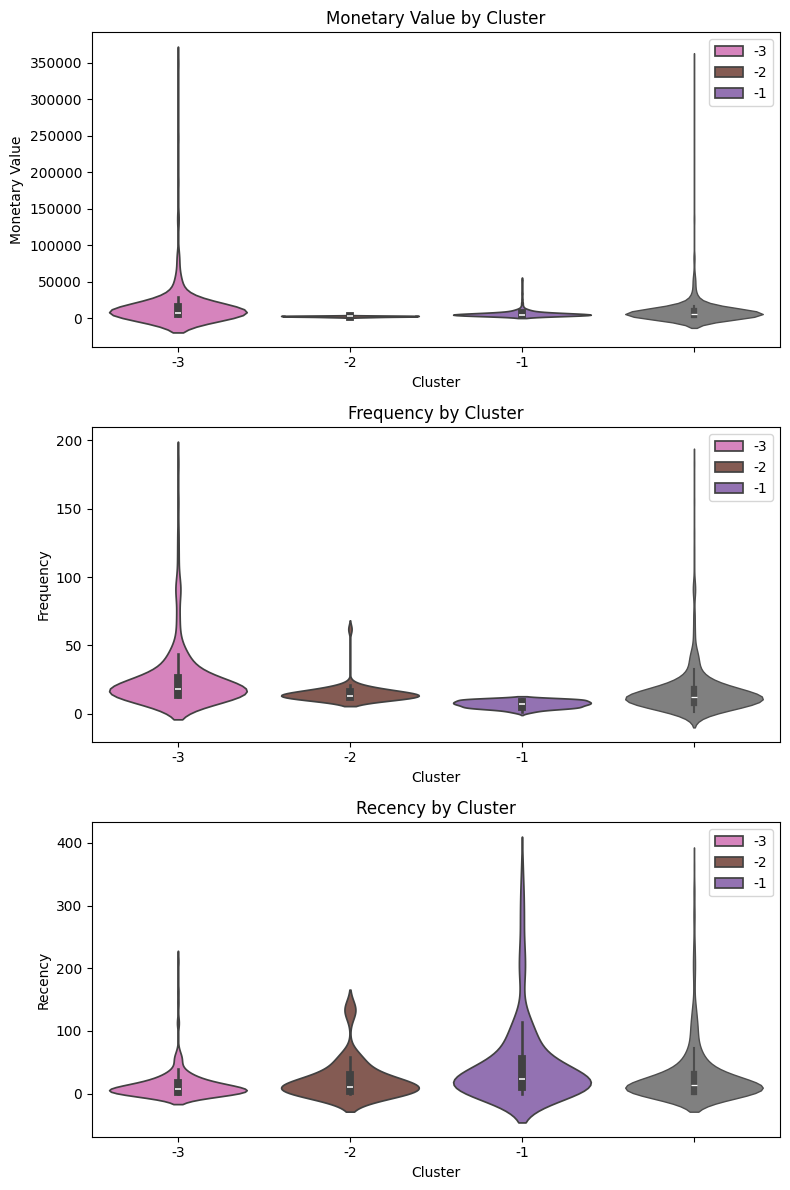

In [52]:
cluster_colors = {
    -1: "#9467bd",
    -2: "#8c564b",
    -3: "#e377c2"
}

plt.figure(figsize = (8, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x = outlier_clusters["Cluster"], y = outlier_clusters["MonetaryValue"], palette = cluster_colors, hue = outlier_clusters["Cluster"])
sns.violinplot(y = outlier_clusters["MonetaryValue"], color = "grey", linewidth = 1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x = outlier_clusters["Cluster"], y = outlier_clusters["Frequency"], palette = cluster_colors, hue = outlier_clusters["Cluster"])
sns.violinplot(y = outlier_clusters["Frequency"], color = "grey", linewidth = 1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x = outlier_clusters["Cluster"], y = outlier_clusters["Recency"], palette = cluster_colors, hue = outlier_clusters["Cluster"])
sns.violinplot(y = outlier_clusters["Recency"], color = "grey", linewidth = 1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

1. Cluster -1 (Purple): "Occasional Buyers"
    - Moderate-value customers with infrequent purchases, who made transactions a long time ago.

2. Cluster -2 (Brown): "Low-Engagement Shoppers"
    - Low-value, infrequent customers who also made transactions a while ago but are slightly more engaged than Cluster -1.

3. Cluster -3 (Pink): "VIP Shoppers"
    - Represents high-value, high-frequency customers with relatively recent activity, though it includes some extreme outliers in spending and frequency.

In [54]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "OCCASIONAL BUYERS",
    -2: "LOW-ENGAGEMET BUYERS",
    -3: "VIP SHOPPERS"
}

In [53]:
full_clustering = pd.concat([non_outliers_df, outlier_clusters])

full_clustering

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3


In [55]:
full_clustering["ClusterLabel"] = full_clustering["Cluster"].map(cluster_labels)

full_clustering.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2,NURTURE


C:\Users\rahul\AppData\Local\Temp\ipykernel_34592\3871851981.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = "right")


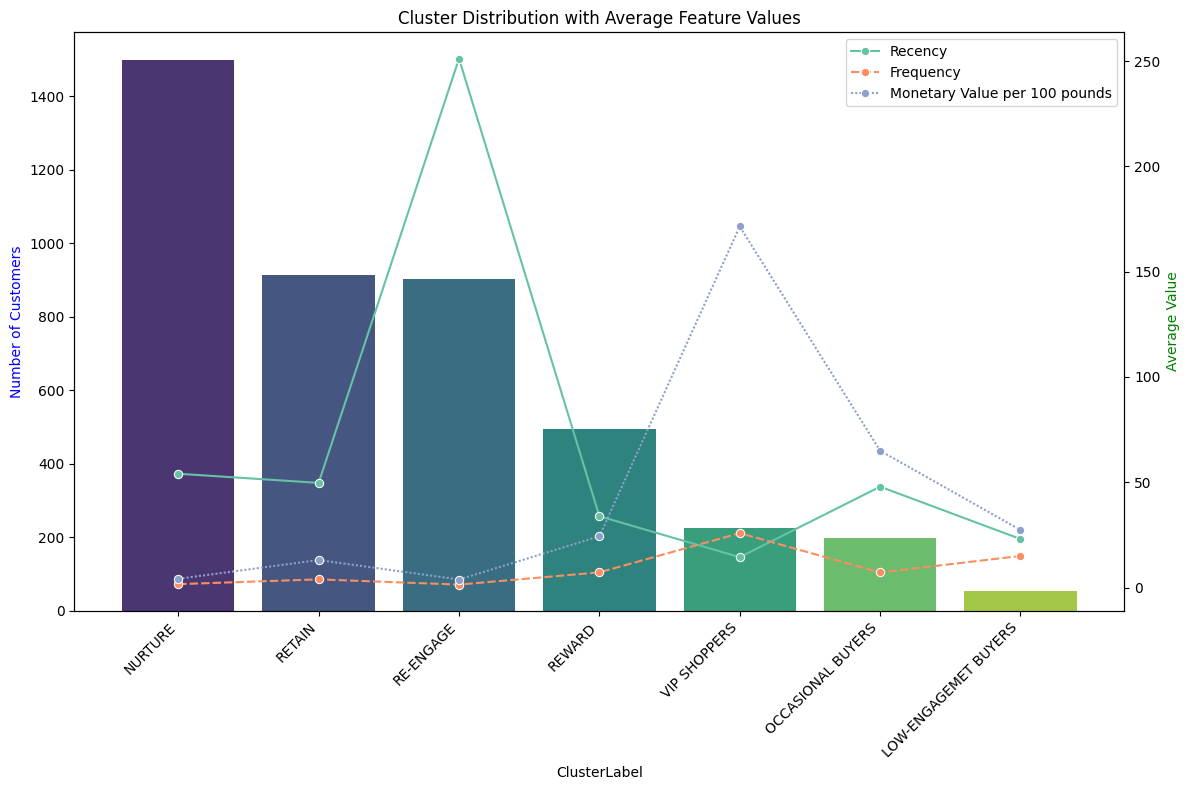

In [66]:
cluster_count = full_clustering["ClusterLabel"].value_counts()
full_clustering["Monetary Value per 100 pounds"] = full_clustering["MonetaryValue"] / 100.0
feature_names = full_clustering.groupby("ClusterLabel")[["Recency", "Frequency", "Monetary Value per 100 pounds"]].mean()

fig, ax1 = plt.subplots(figsize = (12, 8))

sns.barplot(x = cluster_count.index, y = cluster_count.values, ax = ax1, palette = "viridis", hue = cluster_count.index)
ax1.set_ylabel("Number of Customers", color = "b")
ax1.set_title("Cluster Distribution with Average Feature Values")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = "right")

ax2 = ax1.twinx()

sns.lineplot(data = feature_names, ax = ax2, palette = "Set2", marker = "o")
ax2.set_ylabel("Average Value", color = "g")

plt.tight_layout()
plt.show()